# Recurrent Neural Network

## Part 1 - Data Preprocessing


### Importing the libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
#.values to create numpy aaray as NN expects array as an input

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1)) #default
training_set_scaled = sc.fit_transform(training_set) #all values are between 0 and 1

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [40]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# we have 1 indicator
# 3D tensor with shape (batch size, timesteps, indicators)

## Part 2 - Building the RNN

### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [7]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
# Units=50- No.  of LSTM cells/No. of neurons
# when you add multiple LSTM layers set return_sequences= True at final LSTM layer set it false which is it's default value
# we add dropout regularisation to avoid overfitting
# Rate of neurons you want to drop/ignore in reguralisation 0.2(20%) is ideal no.

### Adding a second LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [13]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [15]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 21s 136ms/step - loss: 0.0467
Epoch 2/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0084
Epoch 3/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0064
Epoch 4/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0055
Epoch 9/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0049
Epoch 11/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0040
Epoch 13/100

### Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [16]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [17]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values  #[lower bound: upper bound]
#this will give us the stock price values of last 3 months and also of january
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
#if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 5s 5s/step


## Visualising the results

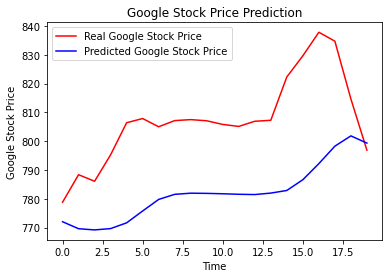

In [18]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## Evaluating RNN
### Root Mean Squared Error

In [58]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(real_stock_price,predicted_stock_price))

27.889938412661067